<a href="https://colab.research.google.com/github/jccamposro/IAyMiniRobots/blob/main/Ejercicios%20Capitulo%203/Tarea3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travelling Salesperson Problem solved using genetic algorithms

In [2]:
# Imports
import numpy as np
import random

from datetime import datetime

In [3]:
# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.3

In [4]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Berlin': [16, 34],
 'London': [92, 99],
 'Moscow': [10, 24],
 'Barcelona': [19, 18],
 'Rome': [42, 0],
 'Paris': [3, 94],
 'Vienna': [45, 89],
 'Munich': [96, 47],
 'Istanbul': [56, 76],
 'Kyiv': [73, 27],
 'Bucharest': [93, 72],
 'Minsk': [11, 36],
 'Warsaw': [24, 20],
 'Budapest': [64, 86],
 'Milan': [72, 47],
 'Prague': [63, 2],
 'Sofia': [3, 40],
 'Birmingham': [88, 8],
 'Brussels': [35, 57],
 'Amsterdam': [3, 34]}

## 1. Create the first population set
We randomly shuffle the cities N times where N=population_size

In [5]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['Amsterdam', 'Berlin', 'Istanbul', ..., 'Moscow', 'Bucharest',
        'Budapest'],
       ['Minsk', 'Kyiv', 'London', ..., 'Paris', 'Barcelona', 'Munich'],
       ['Munich', 'Vienna', 'Birmingham', ..., 'Bucharest', 'Kyiv',
        'Warsaw'],
       ...,
       ['London', 'Minsk', 'Sofia', ..., 'Birmingham', 'Brussels',
        'Berlin'],
       ['Budapest', 'Rome', 'Prague', ..., 'Moscow', 'Bucharest',
        'Barcelona'],
       ['Prague', 'Kyiv', 'Budapest', ..., 'Bucharest', 'Vienna',
        'Munich']], dtype='<U10')

## 2. Evaluate solutions fitness
The solutions are defined so that the first element on the list is the first city to visit, then the second, etc. and the last city is linked to the first.
The fitness function needs to compute the distance between subsequent cities.

In [6]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [7]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([1212.59815729, 1007.62747829, 1026.17229027, 1035.10455919,
       1016.07469304, 1039.73670526, 1120.93289453, 1157.98749863,
       1145.31601777, 1043.46072758, 1099.41684079, 1077.15779418,
       1141.93057506, 1286.8244614 , 1092.6983334 , 1323.63205878,
        972.83449963, 1121.97809423, 1015.3533477 , 1076.78812037,
       1197.11195076, 1474.9366825 , 1238.3318278 , 1170.22764445,
       1163.44012834,  972.48215971,  964.68279273, 1186.3137875 ,
       1110.80342322,  919.50242988, 1032.7620863 , 1013.80843754,
       1092.83703444,  904.37690395, 1232.19057952, 1071.16482484,
       1107.19085487, 1112.94426212, 1101.79168455, 1047.87523015,
       1257.75612089,  965.52696375, 1120.74103951, 1110.75902043,
       1246.83410752, 1070.40192047, 1143.22946334, 1154.64943341,
       1083.80926022, 1127.82207311, 1339.123052  , 1053.51437251,
       1040.46181828, 1253.88262448, 1272.64185203, 1161.875376  ,
       1104.31906667, 1152.61696171, 1089.5130159 , 1022.69942

# 3. Progenitors selection
I will select a new set of progenitors using the Roulette Wheel Selection. Generates a list of progenitor pairs where N= len(population_set) but at each position there are two solutions to merge

In [8]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit

    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]


    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['Amsterdam', 'Bucharest', 'Milan', 'Barcelona', 'Brussels', 'Rome',
       'Budapest', 'Sofia', 'Vienna', 'Istanbul', 'Warsaw', 'Minsk',
       'Munich', 'Kyiv', 'Paris', 'Prague', 'Berlin', 'London',
       'Birmingham', 'Moscow'], dtype='<U10')

# 4. Mating
For each pair of  parents we'll generate an offspring pair. Since we cannot repeat cities what we'll do is copy a random chunk from one progenitor and fill the blanks with the other progenitor.

In [9]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring



def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Kyiv', 'Istanbul', 'Birmingham', 'Budapest', 'Rome', 'Sofia',
       'London', 'Brussels', 'Paris', 'Milan', 'Moscow', 'Minsk',
       'Warsaw', 'Munich', 'Barcelona', 'Bucharest', 'Amsterdam',
       'Prague', 'Berlin', 'Vienna'], dtype='<U10')

# 5. Mutation
Now for each element of the new population we add a random chance of swapping

In [10]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring


def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Vienna', 'Istanbul', 'Prague', 'Budapest', 'Amsterdam', 'Sofia',
       'London', 'Brussels', 'Paris', 'Milan', 'Moscow', 'Rome', 'Munich',
       'Barcelona', 'Warsaw', 'Bucharest', 'Minsk', 'Birmingham',
       'Berlin', 'Kyiv'], dtype='<U10')

# 6. Stopping
To select the stopping criteria we'll need to create a loop to stop first. Then I'll set it to loop at 1000 iterations.

In [11]:
best_solution = [-1,np.inf,np.array([])]
for i in range(10000):
    if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)

    mutated_pop = mutate_population(new_population_set)

0 835.9140626087759 1113.594481052604 22/09/23 17:03
100 855.2386324281691 1094.339986785928 22/09/23 17:03
200 903.1609621526583 1100.9372592526336 22/09/23 17:03
300 849.7844270325845 1113.3875791239725 22/09/23 17:03
400 881.5131223977972 1108.8470377407136 22/09/23 17:03
500 788.6452492087459 1101.9889039555894 22/09/23 17:03
600 919.7125163255653 1116.7066952998368 22/09/23 17:03
700 836.0400777467597 1127.1769882320211 22/09/23 17:03
800 756.4529154139277 1100.6009565255822 22/09/23 17:03
900 908.2500839679984 1094.6444924141274 22/09/23 17:03
1000 821.6377646368211 1123.3676072583191 22/09/23 17:03
1100 861.1806941082948 1115.4308008519954 22/09/23 17:03
1200 841.7401010271755 1106.353891672014 22/09/23 17:03
1300 906.3098454521453 1106.5836276760754 22/09/23 17:03
1400 893.410786541076 1112.9465764639172 22/09/23 17:03
1500 862.0893593334141 1095.2592345432697 22/09/23 17:03
1600 903.3452961449923 1107.5342311271825 22/09/23 17:03
1700 827.0973917642784 1090.0828123576869 22/09

In [12]:
best_solution

[5416,
 620.1842861164691,
 array([['Paris', 'Minsk', 'Berlin', 'Brussels', 'Amsterdam', 'Sofia',
         'Moscow', 'Vienna', 'Warsaw', 'Barcelona', 'Rome', 'Prague',
         'Kyiv', 'Birmingham', 'Milan', 'London', 'Istanbul', 'Budapest',
         'Bucharest', 'Munich']], dtype='<U10')]

# Gráfica 1: Selección por Ruleta y Tasa de Mutación Baja

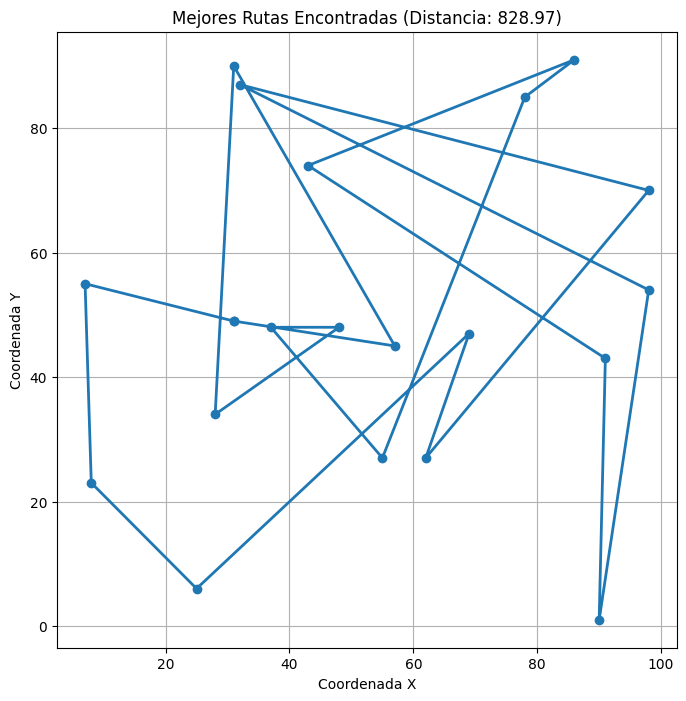

In [25]:
import matplotlib.pyplot as plt


# Visualización de la mejor solución encontrada
best_solution_coords = []

for city_list in best_solution[2]:
    city_coords = [cities_dict[city] for city in city_list]
    city_coords.append(city_coords[0])  # Agregar el punto de inicio al final para cerrar el ciclo
    best_solution_coords.append(city_coords)

plt.figure(figsize=(8, 8))
for city_coords in best_solution_coords:
    x, y = zip(*city_coords)
    plt.plot(x, y, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title(f'Mejores Rutas Encontradas (Distancia: {best_solution[1]:.2f})')
plt.grid(True)
plt.show()




0 - 22/09/23 18:06
100 828.9657447450898 22/09/23 18:06
200 828.9657447450898 22/09/23 18:06
300 828.9657447450898 22/09/23 18:06
400 828.9657447450898 22/09/23 18:06
500 828.9657447450898 22/09/23 18:06
600 828.9657447450898 22/09/23 18:06
700 828.9657447450898 22/09/23 18:06
800 828.9657447450898 22/09/23 18:06
900 828.9657447450898 22/09/23 18:06
1000 828.9657447450898 22/09/23 18:06
1100 828.9657447450898 22/09/23 18:06
1200 828.9657447450898 22/09/23 18:06
1300 828.9657447450898 22/09/23 18:06
1400 828.9657447450898 22/09/23 18:06
1500 828.9657447450898 22/09/23 18:06
1600 828.9657447450898 22/09/23 18:06
1700 828.9657447450898 22/09/23 18:06
1800 828.9657447450898 22/09/23 18:07
1900 828.9657447450898 22/09/23 18:07
2000 828.9657447450898 22/09/23 18:07
2100 828.9657447450898 22/09/23 18:07
2200 828.9657447450898 22/09/23 18:07
2300 828.9657447450898 22/09/23 18:07
2400 828.9657447450898 22/09/23 18:07
2500 828.9657447450898 22/09/23 18:07
2600 828.9657447450898 22/09/23 18:07
27

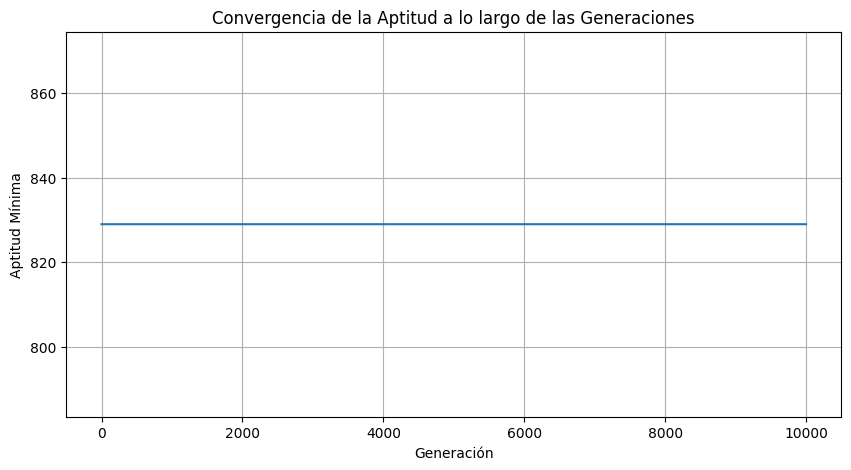

In [24]:
import numpy as np
import random
from datetime import datetime
import matplotlib.pyplot as plt

# Parámetros
n_cities = 20
n_population = 100
mutation_rate = 0.3

# Generación de una lista de coordenadas que representan cada ciudad
coordinates_list = [[x, y] for x, y in zip(np.random.randint(0, 100, n_cities), np.random.randint(0, 100, n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv',
                       'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = {x: y for x, y in zip(names_list, coordinates_list)}

# Función para calcular la distancia entre dos puntos
def compute_city_distance_coordinates(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

# Crear la población inicial
def genesis(city_list, n_population):
    population_set = []
    for i in range(n_population):
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

# Función para evaluar la aptitud
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities):
        a = city_list[i]
        b = city_list[(i + 1) % n_cities]  # Índice circular para volver a la primera ciudad al final
        total += compute_city_distance_names(a, b, cities_dict)
    return total

# Función para obtener la aptitud de todas las soluciones en la población
def get_all_fitness(population_set, cities_dict):
    fitness_list = np.zeros(n_population)
    for i in range(n_population):
        fitness_list[i] = fitness_eval(population_set[i], cities_dict)
    return fitness_list

# Bucle principal para encontrar la mejor solución y registrar la aptitud por generación
best_solution = [-1, np.inf, np.array([])]
fit_history = []

for i in range(10000):
    if i % 100 == 0:
        print(i, fit_history[-1] if fit_history else "-", datetime.now().strftime("%d/%m/%y %H:%M"))
    fitness_list = get_all_fitness(population_set, cities_dict)

    if fitness_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitness_list.min()
        best_solution[2] = np.array(population_set)[fitness_list.min() == fitness_list]

    # Registra la aptitud mínima de esta generación
    fit_history.append(fitness_list.min())

# Visualización de la aptitud mínima a lo largo de las generaciones
plt.figure(figsize=(10, 5))
plt.plot(range(len(fit_history)), fit_history)
plt.xlabel('Generación')
plt.ylabel('Aptitud Mínima')
plt.title('Convergencia de la Aptitud a lo largo de las Generaciones')
plt.grid(True)
plt.show()
